<a href="https://colab.research.google.com/github/arpitsah/Fast.ai-Lectures/blob/master/Fast_ai_Lecture_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai import *
from fastai.vision import *
import matplotlib.pyplot as plt

In [0]:
from PIL import Image

In [3]:
URLs.PETS

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet'

In [4]:
path = untar_data(URLs.PETS)
path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [0]:
path_anno = path/'annotations'
path_img = path/'images'

In [6]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_58.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/shiba_inu_103.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Birman_151.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Birman_126.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/keeshond_153.jpg')]

In [0]:
pat = r'/([^/]+)_\d+.jpg$'

In [8]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms = get_transforms(), size = 224)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
yorkshire_terrier,shiba_inu,Birman,Birman,keeshond
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
pomeranian,Bengal,saint_bernard,Ragdoll,shiba_inu
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

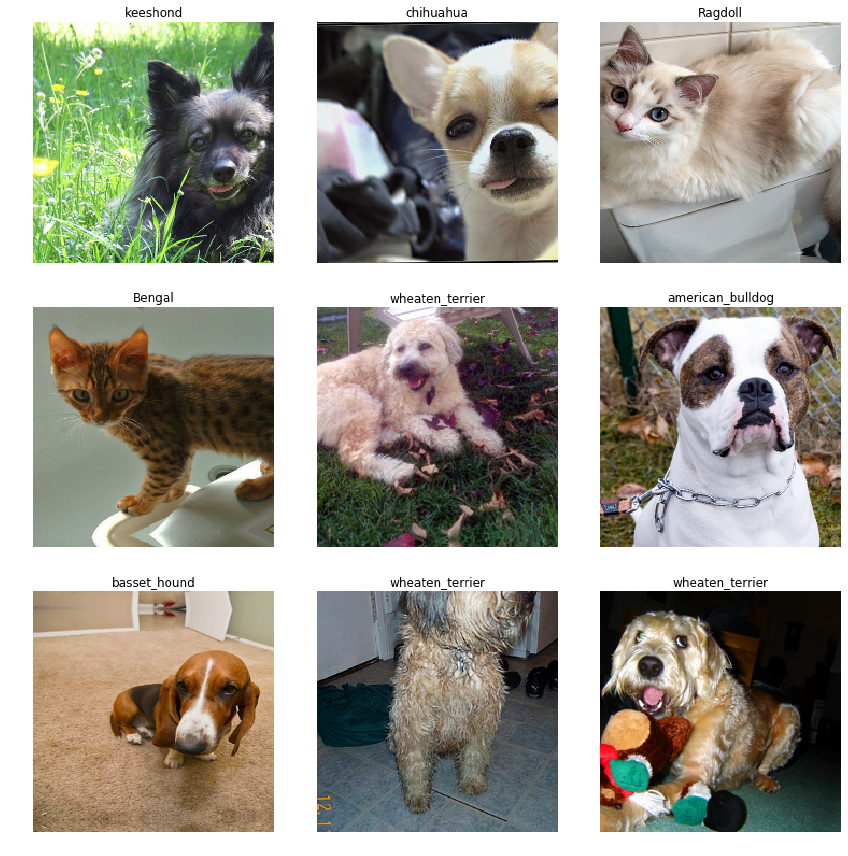

In [9]:
data.show_batch(rows = 3, figsieze=(7,6))

In [10]:
print(data.classes)
len(data.classes), data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

In [11]:
learn = cnn_learner(data, models.resnet34, metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:00, 92507782.47it/s]


In [12]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.402318,0.370614,0.112991,01:29
1,0.554374,0.293392,0.095399,01:29
2,0.339494,0.242046,0.077131,01:28
3,0.240889,0.241849,0.077808,01:27


In [0]:
learn.save('stage-1')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

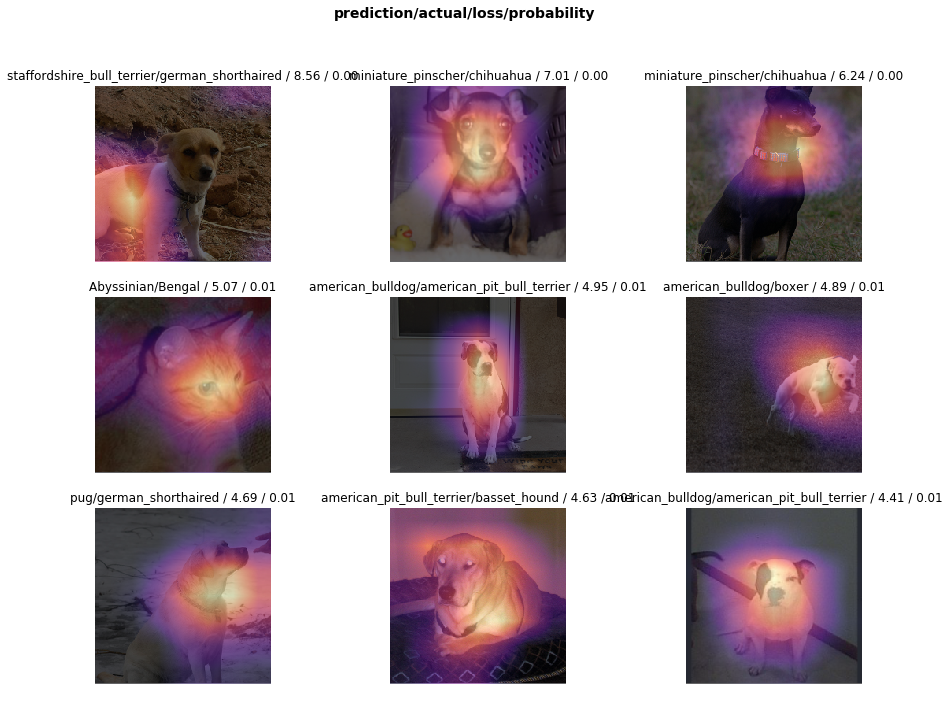

In [20]:
interp.plot_top_losses(9, figsize= (15,11) )

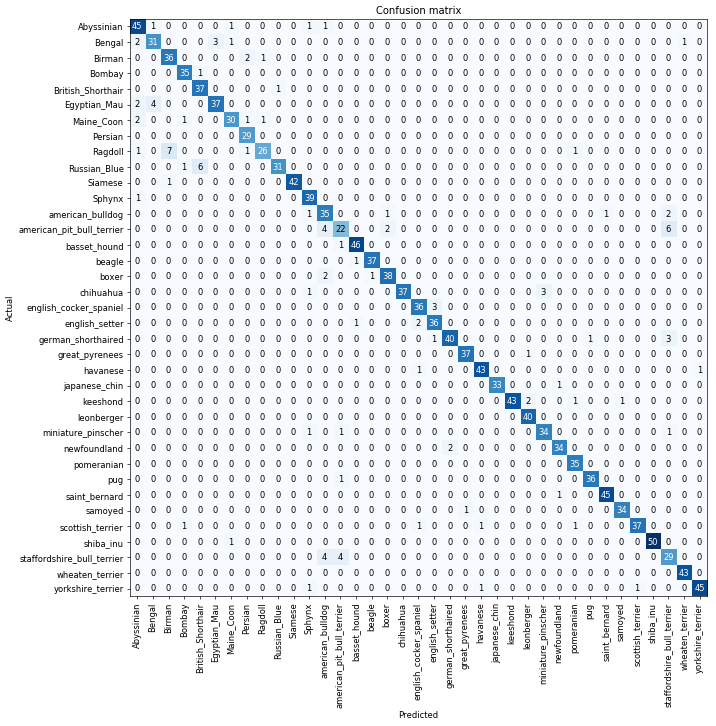

In [21]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [22]:
interp.most_confused(min_val=2)

[('Ragdoll', 'Birman', 7),
 ('Russian_Blue', 'British_Shorthair', 6),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 6),
 ('Egyptian_Mau', 'Bengal', 4),
 ('american_pit_bull_terrier', 'american_bulldog', 4),
 ('staffordshire_bull_terrier', 'american_bulldog', 4),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 4),
 ('Bengal', 'Egyptian_Mau', 3),
 ('chihuahua', 'miniature_pinscher', 3),
 ('english_cocker_spaniel', 'english_setter', 3),
 ('german_shorthaired', 'staffordshire_bull_terrier', 3),
 ('Bengal', 'Abyssinian', 2),
 ('Birman', 'Persian', 2),
 ('Egyptian_Mau', 'Abyssinian', 2),
 ('Maine_Coon', 'Abyssinian', 2),
 ('american_bulldog', 'staffordshire_bull_terrier', 2),
 ('american_pit_bull_terrier', 'boxer', 2),
 ('boxer', 'american_bulldog', 2),
 ('english_setter', 'english_cocker_spaniel', 2),
 ('keeshond', 'leonberger', 2),
 ('newfoundland', 'german_shorthaired', 2)]

In [23]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


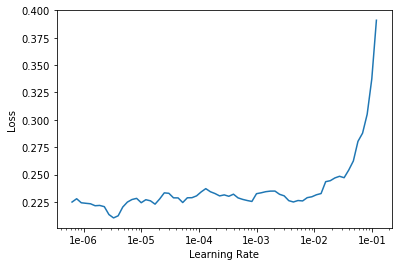

In [24]:
learn.recorder.plot()

In [25]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.232412,0.227740,0.079161,01:33
1,0.207505,0.221988,0.071719,01:33
